## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Segmenting MR Knee Images](https://sbonaretti.github.io/pyKNEEr/segmentation.html)

Segmentation is performed using an atlas-based algorithm. Given a segmented image (reference image), we use registration to segment each image (moving image) of the dataset. 

The segmentation consists of two parts:  
- Segment bone (used to initialize femoral cartilage segmentation)
- Segment cartilage

Each part is composed by 3 steps:  
- Step 1: *Register image to reference*. The moving image is registered to the reference image
- Step 2: *Invert transformation*. Transformations are inverted
- Step 3: *Warp reference mask to moving image*. Inverted transformations are applied to the mask of the reference image to obtain the mask of the moving image  

Registration, inversion, and warping are executed by calling *elastix*[1].

---

*Automatic data download for the reproducibility of this notebook:*
- Download input images from Zenodo and image file list from GitHub:

In [ ]:
import os
import wget
from zipfile import ZipFile 

In [ ]:
# local folder  
local_folder_name  = "./OAI1/"
# Zenodo variables
input_URL          = "https://zenodo.org/record/2583184/files/"
zipped_folder_name = "OAI1_preprocessed.zip" 
zipped_ref_name    = "OAI1_reference.zip"
# GitHub variables
raw_url            = "https://raw.githubusercontent.com/sbonaretti/pyKNEEr/master/publication/data/"
input_file_name    = "image_list_segmentation_OAI1_DESS.txt"

In [ ]:
# create local folder for dataset
if not os.path.isdir(local_folder_name):
    os.mkdir(local_folder_name)
    print ("folder " + local_folder_name + " created")

In [ ]:
# download zipped folder from Zenodo
wget.download(input_URL + zipped_folder_name, local_folder_name + zipped_folder_name) 

In [ ]:
# download reference image
wget.download(input_URL + zipped_ref_name, local_folder_name + zipped_ref_name)

In [ ]:
# unzip image folder
with ZipFile(local_folder_name + zipped_folder_name, 'r') as zip: 
    zip.extractall(local_folder_name) 

In [ ]:
# unzip reference image
with ZipFile(local_folder_name + zipped_ref_name, 'r') as zip: 
    zip.extractall(local_folder_name) 

In [ ]:
# download input file from GitHub
wget.download(raw_url + input_file_name, "./" + input_file_name)

---

## Import packages

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from pykneer import pykneer_io          as io
from pykneer import segmentation_for_nb as segm

## Image information

Inputs:   
- `input_file_name` contains the list of the images to be segmented  
- `modality` can be "newsubject", "longitudinal", or "multimodal"
- `n_of_cores` is the number of cores used for computations (computations are parallelized for speed)

In [3]:
input_file_name = "./image_list_segmentation_OAI1_DESS.txt" # commented out because downloaded from GitHub
modality        = "newsubject" # use "newsubject", "longitudinal", or "multimodal" 
n_of_cores      = 10

#### Read image data
- `image_data` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
image_data = io.load_image_data_segmentation(modality, input_file_name)

-> image information loaded


## Reference image

The reference image is the number 9 of the current dataset. It was selected as a results of a convergence study described in the paper.
Here we check if femur mask and femur cartilage masks of the reference image are present

In [5]:
segm.prepare_reference(image_data)

reference.mha
-> Reference preparation completed


## Segment bone

#### 1. Register image to reference

In [6]:
segm.register_bone_to_reference(image_data, n_of_cores)

-> Registration completed
-> The total time was 653.91 seconds (about 10 min)


#### 2. Invert transformations

In [7]:
segm.invert_bone_transformations(image_data, n_of_cores)

-> Inversion completed
-> The total time was 330.00 seconds (about 5 min)


#### 3. Warp reference mask to moving image

In [8]:
segm.warp_bone_mask(image_data, n_of_cores)

-> Warping completed
-> The total time was 236.69 seconds (about 3 min)


## Segment cartilage

#### 1. Register image to reference

In [9]:
segm.register_cartilage_to_reference(image_data, n_of_cores)

-> Registration completed
-> The total time was 416.31 seconds (about 6 min)


#### 2. Invert transformations

In [10]:
segm.invert_cartilage_transformations(image_data, n_of_cores)

-> Inversion completed
-> The total time was 237.75 seconds (about 3 min)


#### 3. Warp reference mask to moving image (optional)

In [11]:
segm.warp_cartilage_mask(image_data, n_of_cores)

-> Warping completed
-> The total time was 228.34 seconds (about 3 min)


## Visualize segmentations
Visual check of the results. For each image (row), segmentation at medial, central, and lateral compartments

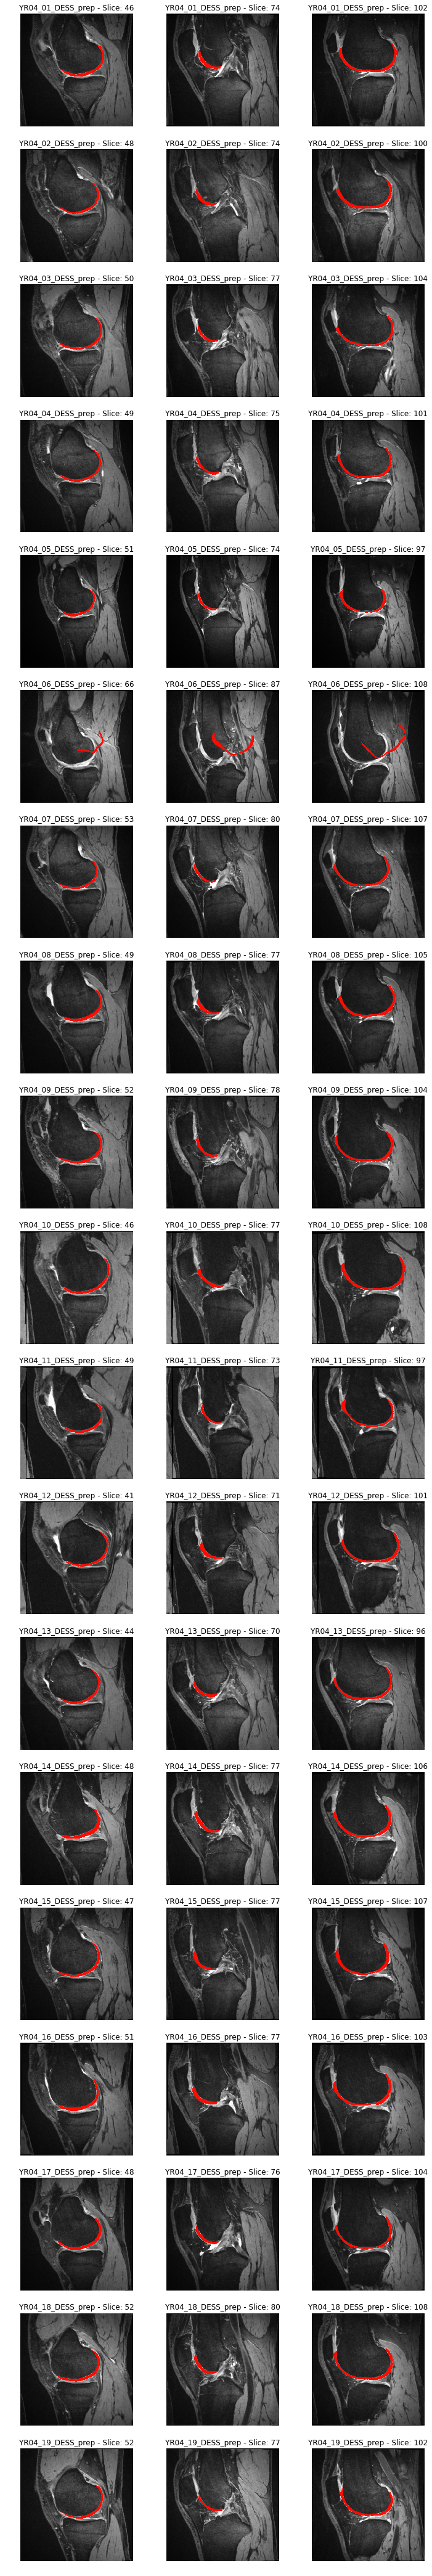

In [12]:
segm.show_segmented_images(image_data)

### References

[1] Klein S., Staring M., Murphy K., Viergever M.A., Pluim J.P.W. [*elastix: A Toolbox for Intensity-Based Medical Image Registration*](http://elastix.isi.uu.nl/marius/downloads/2010_j_TMI.pdf) IEEE Transactions on Medical Imaging. vol. 29, no. 1, pp. 196 - 205, January. 2010. 

### Dependencies

In [13]:
%load_ext watermark
print ("elastix 4.8.0\n")
%watermark -v -m -p SimpleITK,numpy,matplotlib,multiprocessing

elastix 4.8.0

CPython 3.6.1
IPython 6.4.0

SimpleITK unknown
numpy 1.14.5
matplotlib 2.2.2
multiprocessing unknown

compiler   : GCC 4.8.5 20150623 (Red Hat 4.8.5-11)
system     : Linux
release    : 3.10.0-862.14.4.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 20
interpreter: 64bit
